In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Попробовать Label encoding

In [15]:
pwd

'C:\\Users\\User\\Documents\\Github\\Insurance'

In [17]:
ls

 Volume in drive C is Windows 8.1
 Volume Serial Number is 7A10-F639

 Directory of C:\Users\User\Documents\Github\Insurance

22.10.2022  21:09    <DIR>          .
22.10.2022  21:09    <DIR>          ..
22.10.2022  21:10    <DIR>          .git
22.10.2022  21:09                 5 .gitignore
22.10.2022  20:41    <DIR>          .ipynb_checkpoints
22.10.2022  20:49               165 ~$Insurance_data.xlsx
22.10.2022  21:03             1В 262 Insurance model.ipynb
22.10.2022  20:49         1В 457В 101 Insurance_data.xlsx
22.10.2022  20:40                58 README.md
22.10.2022  20:32         1В 457В 061 Р—Р°РґР°РЅРёРµ (РїСЂРѕР»РѕРЅРіР°С†РёСЏ).xlsx
               6 File(s)      2В 915В 652 bytes
               4 Dir(s)  133В 734В 805В 504 bytes free


In [28]:
data_full = pd.read_excel(r'Задание (пролонгация).xlsx', sheet_name='data_full')

In [29]:
data_full

,ID,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
0,1,Магнитогорский,Иностранные,Челябинская область,NaN,TOYOTA,RAV 4,2018,Нет,Состоит в браке,...,42,24,1.00,1400000,M,0,55000,0.040,0,0
1,2,Магнитогорский,Отечественные,Челябинская область,NaN,LADA,GRANTA,2016,Нет,Состоит в браке,...,41,4,1.05,200000,M,0,10000,0.010,0,0
2,3,Ростовский,Отечественные,Ростовская область,NaN,LADA,GRANTA,2018,Нет,Не состоит в браке,...,49,20,0.95,400000,F,0,30000,0.065,1,1
3,4,Казанский,Иностранные,Республика Татарстан,NaN,KIA,RIO,2016,Нет,Не состоит в браке,...,40,15,1.10,400000,M,0,10000,0.020,1,0
4,5,Московский,Иностранные,Москва,NaN,DATSUN,ON-DO,2018,Нет,Состоит в браке,...,58,23,1.00,400000,M,0,10000,0.015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,10859,Кемеровский,Иностранные,Кемеровская область,NaN,HYUNDAI,GRAND SANTA FE,2018,Нет,Состоит в браке,...,44,21,1.00,1800000,M,0,70000,0.035,1,-1
10859,10860,Ижевский,Отечественные,Удмуртская Республика,NaN,LADA,GRANTA,2016,Нет,Не состоит в браке,...,33,15,1.00,200000,M,0,20000,0.080,1,-1
10860,10861,Новосибирский,Иностранные,Белгородская область,NaN,KIA,CERATO,2017,Да,Состоит в браке,...,55,36,1.05,600000,F,0,10000,0.010,0,-1
10861,10862,Ростовский,Отечественные,Ростовская область,NaN,LADA,GRANTA,2018,Нет,Состоит в браке,...,60,32,1.00,400000,M,0,30000,0.050,0,-1


In [31]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10863 non-null  int64  
 1   Filial           10863 non-null  object 
 2   Type_ts          10863 non-null  object 
 3   passport_region  10863 non-null  object 
 4   VIP              284 non-null    object 
 5   Brand            10863 non-null  object 
 6   Model            10863 non-null  object 
 7   Yr_production    10863 non-null  int64  
 8   GAP              10863 non-null  object 
 9   married          10863 non-null  object 
 10  KBM              10863 non-null  int64  
 11  KBM_prol_est     10863 non-null  int64  
 12  delta_kbm        10863 non-null  int64  
 13  deduct           10863 non-null  object 
 14  deduct_amount    10863 non-null  object 
 15  product          10863 non-null  object 
 16  Bank             10863 non-null  object 
 17  channel - ma

In [39]:
data_full['VIP'].loc[data_full['VIP'].notna()].unique()

array(['Особый статус +', 'Особый статус'], dtype=object)

In [49]:
data_full['VIP'] = data_full['VIP'].replace(np.nan, 'Без статуса' )

In [50]:
data_full['VIP'].loc[data_full['VIP'].notna()].unique()

array(['Без статуса', 'Особый статус +', 'Особый статус'], dtype=object)

In [55]:
data_cat = data_full.select_dtypes(include='object')
data_num = data_full.select_dtypes(include=['int64', 'float64'])

In [54]:
data_cat

,Filial,Type_ts,passport_region,VIP,Brand,Model,GAP,married,deduct,deduct_amount,product,Bank,channel - map,category,kvs_type,sex
0,Магнитогорский,Иностранные,Челябинская область,Без статуса,TOYOTA,RAV 4,Нет,Состоит в браке,Франшиза 2-ой страховой случай,20000+,Классика,Банк,Автосалоны,NB 0-1,Водители согласно перечню,M
1,Магнитогорский,Отечественные,Челябинская область,Без статуса,LADA,GRANTA,Нет,Состоит в браке,Без франшизы,0,Компакт,Банк,Автосалоны,RN,Водители согласно перечню,M
2,Ростовский,Отечественные,Ростовская область,Без статуса,LADA,GRANTA,Нет,Не состоит в браке,Без франшизы,0,Классика,Банк,Автосалоны,NB 0-1,Водители согласно перечню,F
3,Казанский,Иностранные,Республика Татарстан,Без статуса,KIA,RIO,Нет,Не состоит в браке,Без франшизы,0,Компакт,Сетелем,Автосалоны,RN,Водители согласно перечню,M
4,Московский,Иностранные,Москва,Без статуса,DATSUN,ON-DO,Нет,Состоит в браке,Без франшизы,0,Компакт,Без банка,Розница,NB 0-1,Водители согласно перечню,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,Кемеровский,Иностранные,Кемеровская область,Без статуса,HYUNDAI,GRAND SANTA FE,Нет,Состоит в браке,Без франшизы,0,Классика,Банк,Автосалоны,NB 0-1,Водители согласно перечню,M
10859,Ижевский,Отечественные,Удмуртская Республика,Без статуса,LADA,GRANTA,Нет,Не состоит в браке,Без франшизы,0,Классика,Сетелем,Автосалоны,RN,Водители согласно перечню,M
10860,Новосибирский,Иностранные,Белгородская область,Без статуса,KIA,CERATO,Да,Состоит в браке,Без франшизы,0,Компакт,Банк,Автосалоны,RN,Водители согласно перечню,F
10861,Ростовский,Отечественные,Ростовская область,Без статуса,LADA,GRANTA,Нет,Состоит в браке,Без франшизы,0,Классика,Банк,Автосалоны,NB 0-1,Водители согласно перечню,M


In [56]:
data_num

,ID,Yr_production,KBM,KBM_prol_est,delta_kbm,Age,Exp,discount,Amount - gr,premium_car,price_gr,price_prc,OSAGO_clnt,target
0,1,2018,8,6,-2,42,24,1.00,1400000,0,55000,0.040,0,0
1,2,2016,8,6,-2,41,4,1.05,200000,0,10000,0.010,0,0
2,3,2018,8,6,-2,49,20,0.95,400000,0,30000,0.065,1,1
3,4,2016,8,6,-2,40,15,1.10,400000,0,10000,0.020,1,0
4,5,2018,8,6,-2,58,23,1.00,400000,0,10000,0.015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,10859,2018,8,6,-2,44,21,1.00,1800000,0,70000,0.035,1,-1
10859,10860,2016,4,2,-2,33,15,1.00,200000,0,20000,0.080,1,-1
10860,10861,2017,8,6,-2,55,36,1.05,600000,0,10000,0.010,0,-1
10861,10862,2018,8,6,-2,60,32,1.00,400000,0,30000,0.050,0,-1


In [68]:
data_1 = data_full[data_full['target']==1]
data_0 = data_full[data_full['target']==0]
cat_cols = list(data_cat.columns)

In [72]:
cat_cols

['Filial',
 'Type_ts',
 'passport_region',
 'VIP',
 'Brand',
 'Model',
 'GAP',
 'married',
 'deduct',
 'deduct_amount',
 'product',
 'Bank',
 'channel - map',
 'category',
 'kvs_type',
 'sex']

In [69]:
for feature_name in cat_cols:
    print(data_cat.value_counts(feature_name))
   

Filial
Московский               3305
Краснодарский            1153
Санкт - Петербургский    1086
Ростовский                553
Воронежский               474
Казанский                 421
Самарский                 394
Магнитогорский            335
Челябинский               320
Пермский                  307
Ижевский                  276
Уфимский                  270
Нижегородский             269
Тверской                  251
Екатеринбургский          243
Ставропольский            234
Волгоградский             232
Новосибирский             186
Белгородский              182
Кемеровский               171
Тульский                  134
Дальневосточный            67
dtype: int64
Type_ts
Иностранные      8353
Отечественные    2510
dtype: int64
passport_region
Москва                          1611
Московская область              1164
Краснодарский край               936
Санкт-Петербург                  739
Ростовская область               544
                                ... 
Магаданская облас

TypeError: 'value' must be an instance of str or bytes, not a int

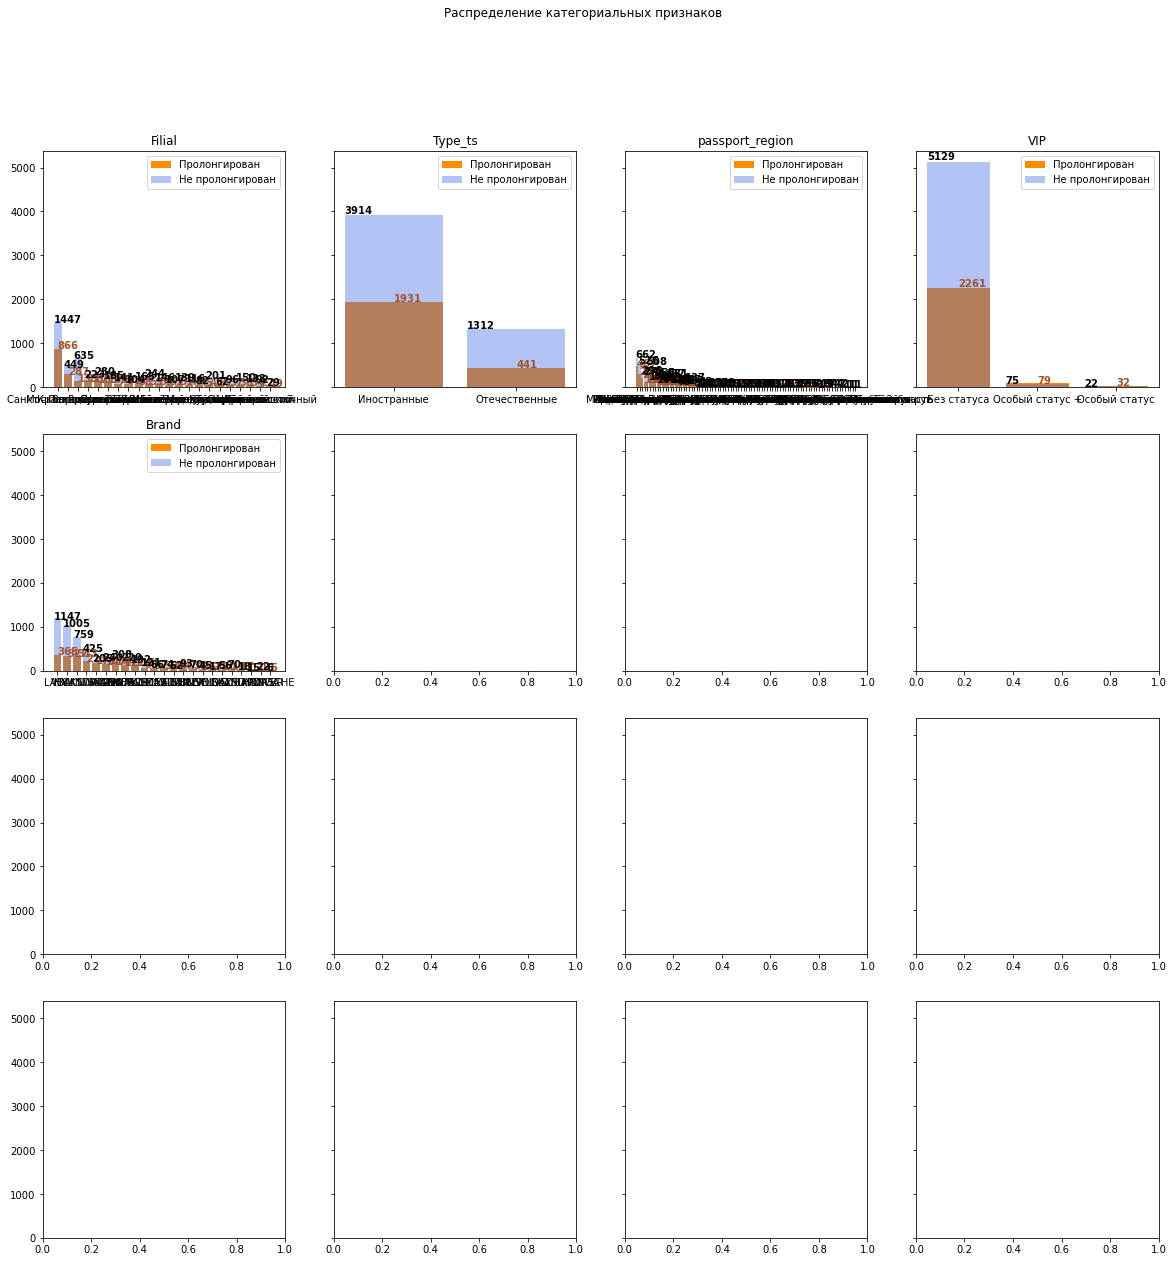

In [71]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)
ax = axes.ravel()
fig.suptitle('Распределение категориальных признаков')

for i, cat_col in enumerate(cat_cols):
  
    val1 = data_1[cat_col].value_counts()
    val0 = data_0[cat_col].value_counts()

    bars1 = ax[i].bar(height=val1,
                    x=val1.index,
                    color='darkorange',
                    label='Пролонгирован')
  
    bars0 = ax[i].bar(height=val0,
                    x=val0.index,
                    color='royalblue',
                    alpha=0.4,
                    label='Не пролонгирован')
    
    for bar in bars1:
        yval = bar.get_height()
        ax[i].text(bar.get_x()+0.5*bar.get_width(),
                   yval * 1.01,
                   yval,
                   color='sienna',
                   fontweight='bold')

    for bar in bars0:
        yval = bar.get_height()
        ax[i].text(bar.get_x(),
                   yval * 1.01,
                   yval,
                   color='black',
                   fontweight='bold')

        ax[i].set_title(cat_col)
        ax[i].legend(loc='upper right')

        if cat_col=='PaymentMethod':
            plt.xticks(rotation=15)    



plt.show()
   

In [ ]:
#Cat_cols = [
#    'Filial',
#    'Type_ts',
#    'passport_region',
#    'VIP',
#    'Brand',
#    'Model',
#    'GAP',
#    'Married',
#    ............
#]